In [1]:
%load_ext autoreload
%autoreload 2

import os
import multiprocessing
from sys import getsizeof

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 300)
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.gridspec import GridSpec
import matplotlib as mpl; mpl.set_loglevel('error')
from tqdm.notebook import tqdm
from astropy.table import Table

from qso_func import match_tables, match_tables_paper, density_map

In [2]:
path_z = '/storage/splus/Catalogues/VACs/qso_z/iDR4'
path_img = 'qsos_z_img'
fields = [file.split('_')[0] for file in os.listdir(path_z) if file.endswith('VAC.csv')]

splus = [field for field in fields if field.startswith('SPLUS')]
stripe = [field for field in fields if field.startswith('STRIPE82')]
hydra = [field for field in fields if field.startswith('HYDRA')]
mc = [field for field in fields if field.startswith('MC')]
print(len(splus), len(stripe), len(hydra), len(mc))
print(len(fields))

savefigs = False
savefigs_2 = True
obj = fields
obs = ' '

974 170 159 111
1414


In [7]:
qsos = pd.read_csv('dr4_qsos_r21.3_sf0.csv')
print(len(qsos.query('PROB_QSO>0.80')))
print(len(qsos.query('PROB_QSO>0.90')))
print(len(qsos.query('PROB_QSO>0.95')))

664606
258000
154858


  0%|          | 0/6 [00:00<?, ?it/s]

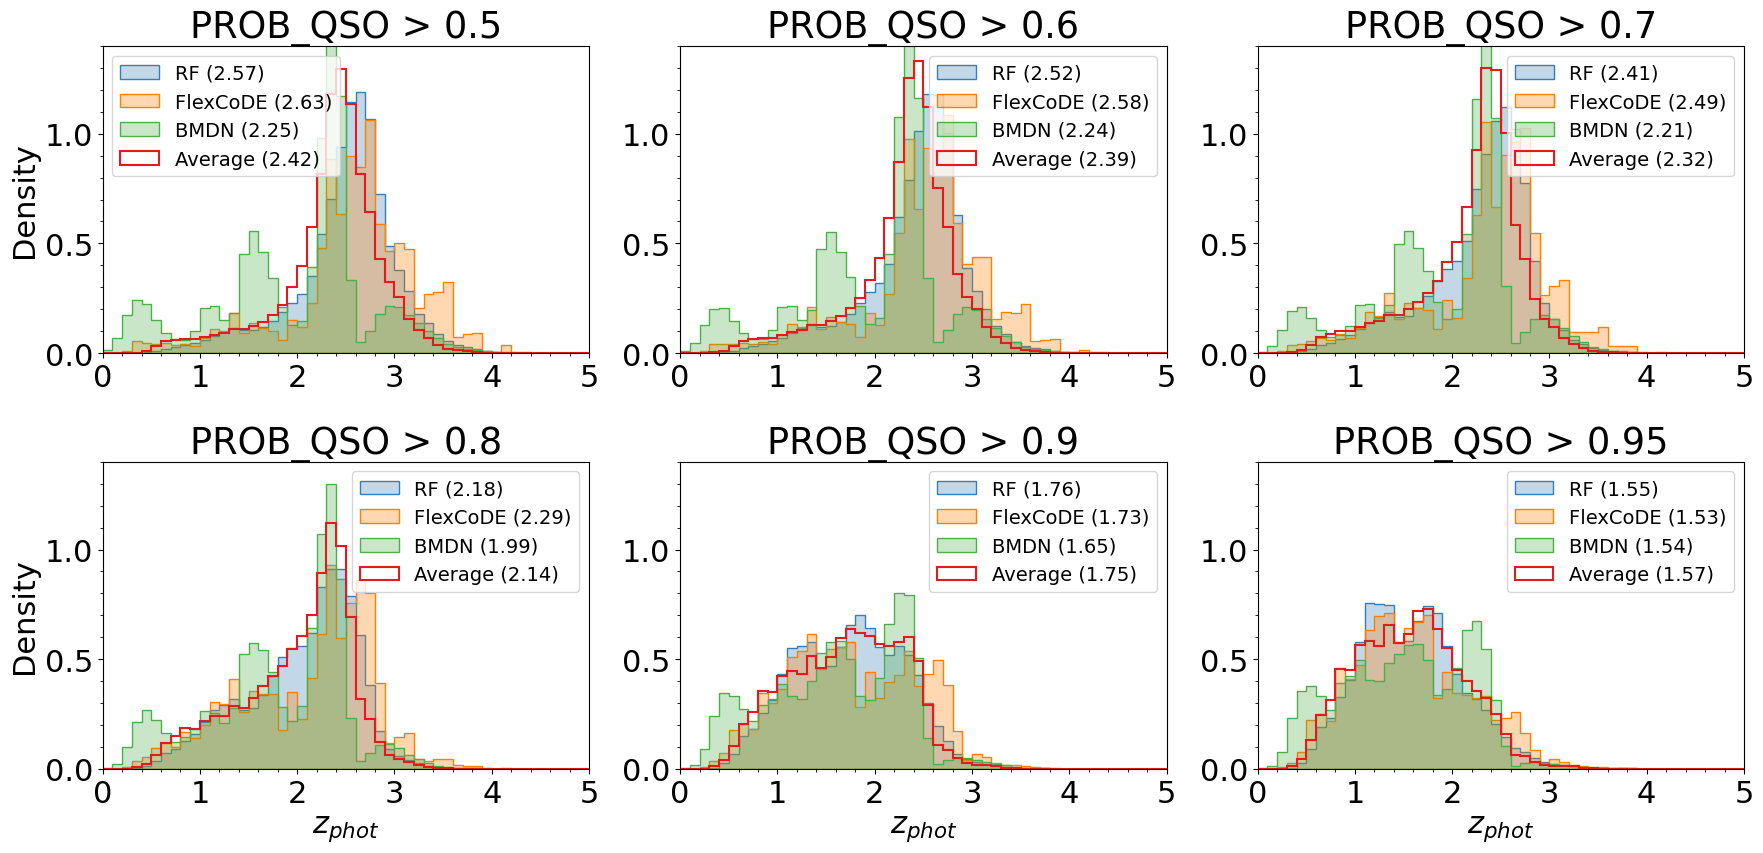

In [11]:
zs = {'RF': 'z_rf', 'FlexCoDE': 'z_flex_peak', 'BMDN': 'z_bmdn_peak', 'Average': 'z_mean'}
probs = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c']
fig = plt.figure(figsize=(18, 9))

for i in tqdm(range(len(probs))):
    ax = plt.subplot(2, 3, i+1)
    for z, model in enumerate(zs):
        rgb = clr.to_rgb(colors[z])
        cut = qsos.query(f'PROB_QSO > {probs[i]}')
        median = cut[zs[model]].median()
        if model != 'Average':
            ax.hist(cut[zs[model]], bins=np.arange(0, 5.1, 0.1), density=True,
                    lw=1, fc=(rgb[0], rgb[1], rgb[2], 0.3), ec=(rgb[0], rgb[1], rgb[2], 1),
                    label=f"{model} ({median:.2f})", histtype='stepfilled')
        else:
            ax.hist(cut[zs[model]], bins=np.arange(0, 5.1, 0.1), density=True,
                    lw=1.5,
                    fc=(rgb[0], rgb[1], rgb[2], 0),
                    ec=(rgb[0], rgb[1], rgb[2], 1),
                    label=f"{model} ({median:.2f})",
                    histtype='step')
        #ax.axvline(median, c=(rgb[0], rgb[1], rgb[2], 1), ls='--')
    if i%3 == 0: ax.set_ylabel('Density')
    if i>2: ax.set_xlabel('$z_{phot}$')
    ax.set_ylim(0, 1.4)
    ax.set_xlim(0, 5)
    ax.set_title(f'PROB_QSO > {probs[i]}')
    ax.legend(fontsize=14)

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, ncols=4, bbox_to_anchor=(0.87, 0.04)) 
fig.tight_layout()
if savefigs_2:
    plt.savefig('hist_zp_2.png',  bbox_inches='tight', facecolor='white', dpi=300)
    plt.savefig('hist_zp_2.eps',  bbox_inches='tight', facecolor='white', format='eps')
plt.show()

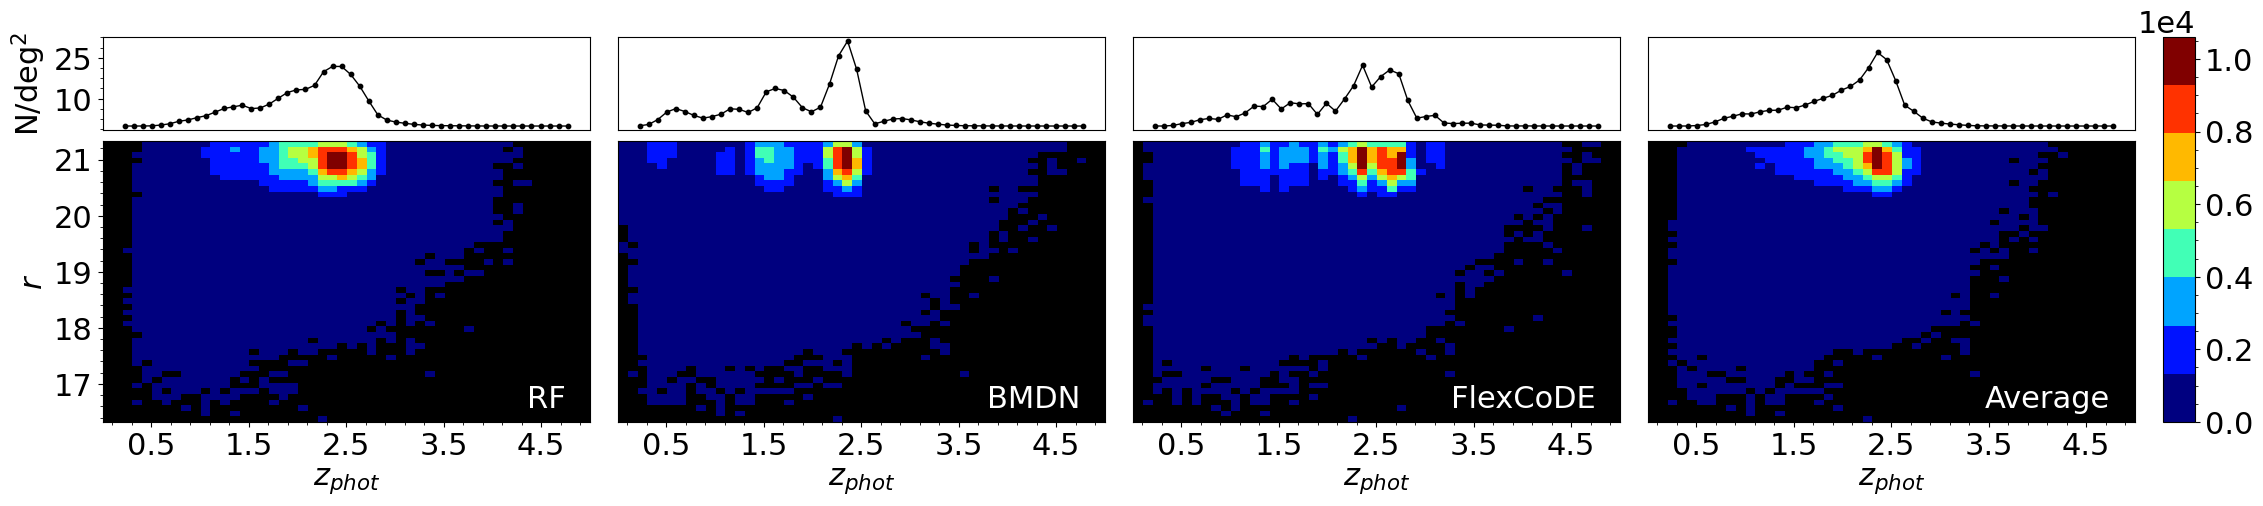

In [4]:
df = pd.read_csv('dr4_qso80.csv')
density_map(df.query('r_PStotal < 21.3 & SEX_FLAGS_DET == 0'),
            ['z_rf', 'z_bmdn_peak', 'z_flex_peak', 'z_mean'], 'r_PStotal', len(obj), False, savefigs_2)

## Other plots

In [ ]:
# with multiprocessing.Pool(processes=16) as pool:
#     df = list(tqdm(pool.imap(match_tables_paper, fields), total=len(fields)))
# df = pd.concat(df)
# df['z_bmdn_peak'] = np.maximum(df['z_bmdn_peak'], 0)
# df.insert(0, 'Field', df.pop('Field'))
# df.insert(0, 'ID', df.pop('ID'))
# print(len(df))
# print(getsizeof(df)/1e9)

In [3]:
with multiprocessing.Pool(processes=16) as pool:
    df2 = list(tqdm(pool.imap(match_tables, fields), total=len(fields)))
df2 = pd.concat(df2)
df2['z_bmdn_peak'] = np.maximum(df2['z_bmdn_peak'], 0)
df2.insert(0, 'Field', df2.pop('Field'))
df2.insert(0, 'ID', df2.pop('ID'))
print(len(df2))
print(getsizeof(df2)/1e9)

  0%|          | 0/1414 [00:00<?, ?it/s]

15909637
4.238709702


In [ ]:
df2.to_csv('dr4_qsos_r22.csv', index=False)

In [ ]:
qsos = df.query('CLASS == 0')
stars = df.query('CLASS == 1')
gals = df.query('CLASS == 2')

In [ ]:
mags = ['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal',
        'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 'i_PStotal', 'J0861_PStotal', 'z_PStotal']
dfs = {'All': df, 'QSOs': qsos, 'Stars': stars, 'Galaxies': gals}
zs = {'RF': 'z_rf', 'FlexCoDE': 'z_flex_peak', 'BMDN': 'z_bmdn_peak', 'Average': 'z_mean'}
n = 0.8
q = ['z_rf > 0', f'PROB_QSO > {n}', f'PROB_STAR > {n}', f'PROB_GAL > {n}']
colors = ['#e69d00', '#009e74', '#56b3e9', '#cc79a7', '#0071b2', '#d54b00']

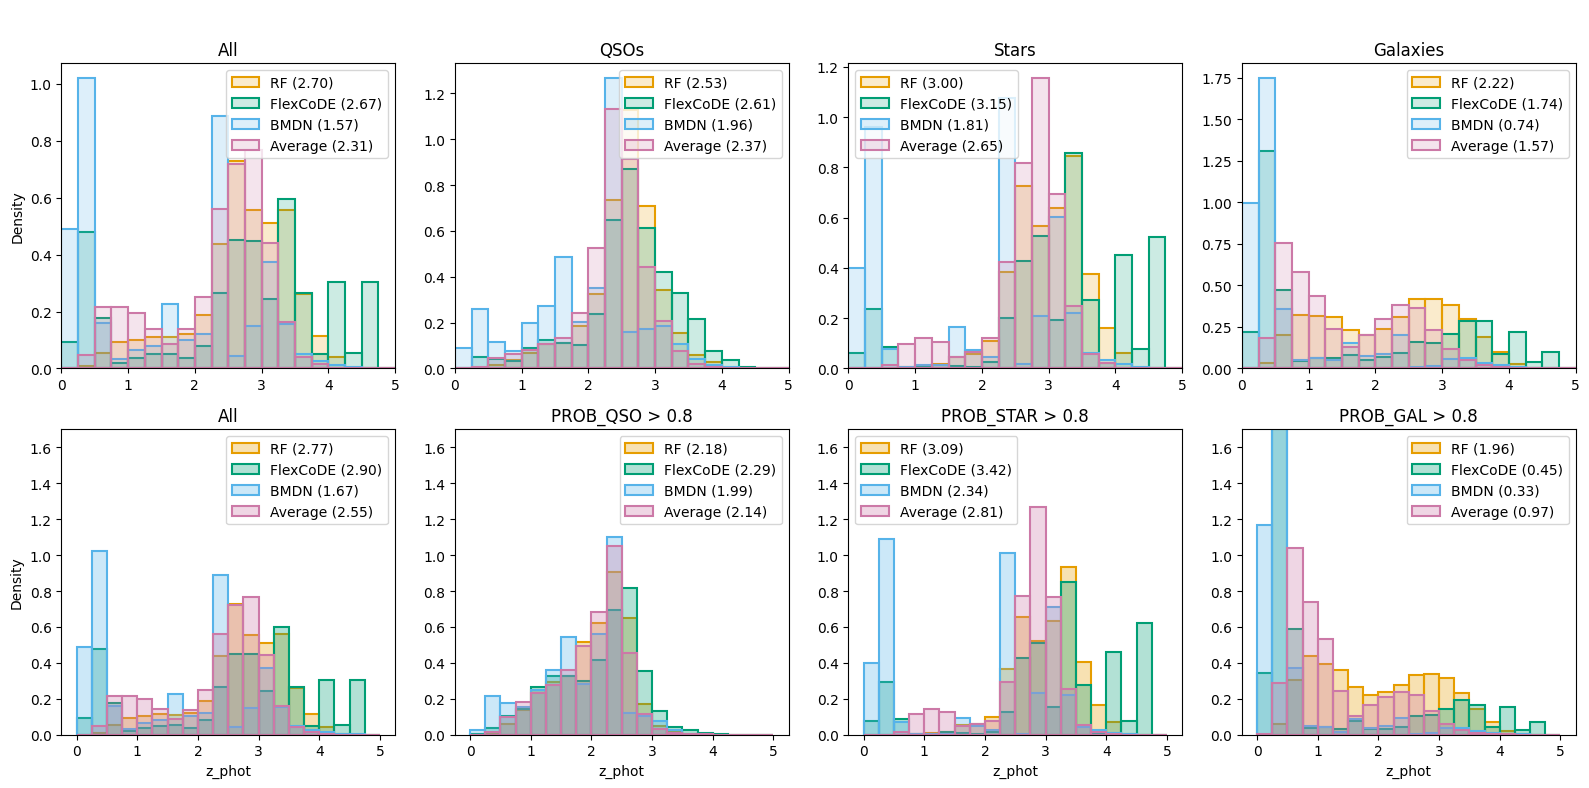

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 4, figsize=(16, 8))

for x, obj in enumerate(dfs):
    for z, model in enumerate(zs):
        rgb = clr.to_rgb(colors[z])
        ax0[x].hist(dfs[obj][zs[model]], bins=np.arange(0, 5.25, 0.25), density=True,
                    lw=1.5, fc=(rgb[0], rgb[1], rgb[2], 0.2), ec=(rgb[0], rgb[1], rgb[2], 1),
                    label=f"{model} ({dfs[obj][zs[model]].mean():.2f})")
        if x == 0: ax0[x].set_ylabel('Density')
        ax0[x].set_title(obj)
        #ax0[x].set_ylim(0, 1.1)
        ax0[x].set_xlim(0, 5)
        ax0[x].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        ax0[x].legend()
        #ax0[x].set_xlabel('z_phot')

for x, obj in enumerate(dfs):
    temp = dfs[obj].query(q[x])
    for z, model in enumerate(zs):
        rgb = clr.to_rgb(colors[z])
        ax1[x].hist(temp[zs[model]], bins=np.arange(0, 5.25, 0.25), density=True,
                    lw=1.5, fc=(rgb[0], rgb[1], rgb[2], 0.3), ec=(rgb[0], rgb[1], rgb[2], 1),
                    label=f"{model} ({temp[zs[model]].median():.2f})")
        if x == 0:
            ax1[x].set_title('All')
            ax1[x].set_ylabel('Density')
        else: ax1[x].set_title(q[x])
        ax1[x].set_ylim(0, 1.7)
        ax1[x].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        ax1[x].legend()
        ax1[x].set_xlabel('z_phot')

fig.suptitle(obs)
fig.tight_layout()
if savefigs: plt.savefig(os.path.join(path_img, 'hist_zp_class'), bbox_inches='tight')
plt.show()

  0%|          | 0/12 [00:00<?, ?it/s]

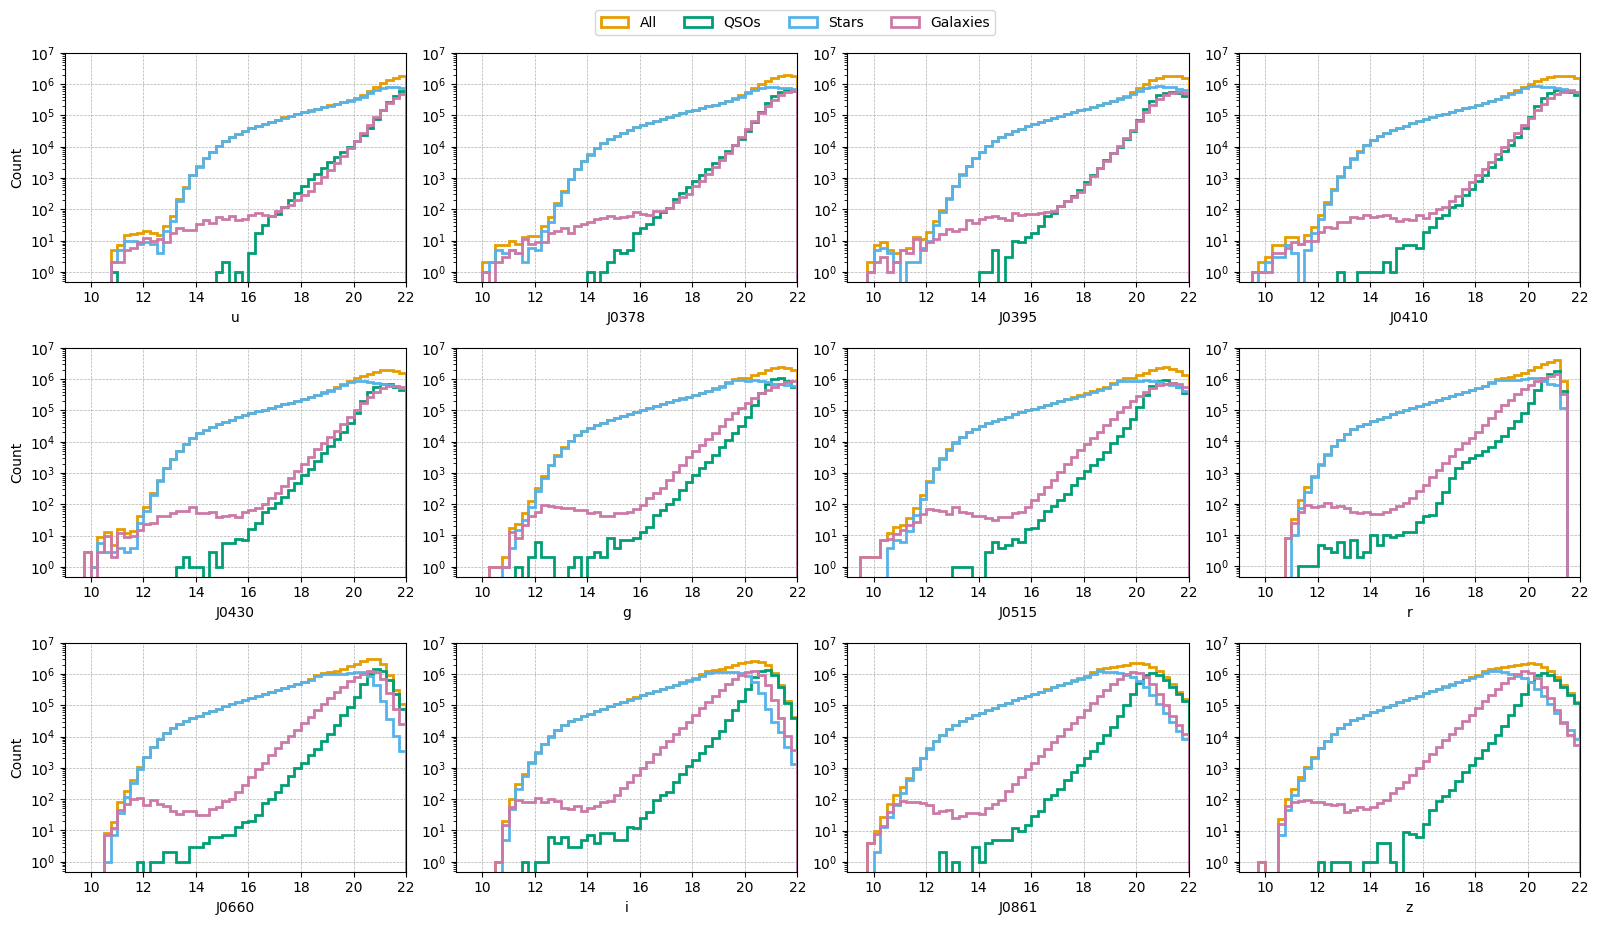

In [ ]:
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
b = 0.25
   
for k in tqdm(range(len(mags))):
    i, j = k//4, k%4
    mag = mags[k]
        
    for x, obj in enumerate(dfs):
        ax[i][j].hist(dfs[obj][mag], bins=np.arange(9, 22+b, b), log=True, label=obj,
                 color=colors[x], histtype='step', lw=2)
    ax[i][j].grid(lw=0.5, ls='--')
    ax[i][j].set_xlim(9, 22)
    ax[i][j].set_ylim(None, 1e7)
    ax[i][j].set_xlabel(mag[:-8])
    if j==0: ax[i][j].set_ylabel('Count')
handles, labels = ax[i][j].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.03))
fig.tight_layout()
if savefigs: plt.savefig(os.path.join(path_img, 'hist_mags_class'), bbox_inches='tight')
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

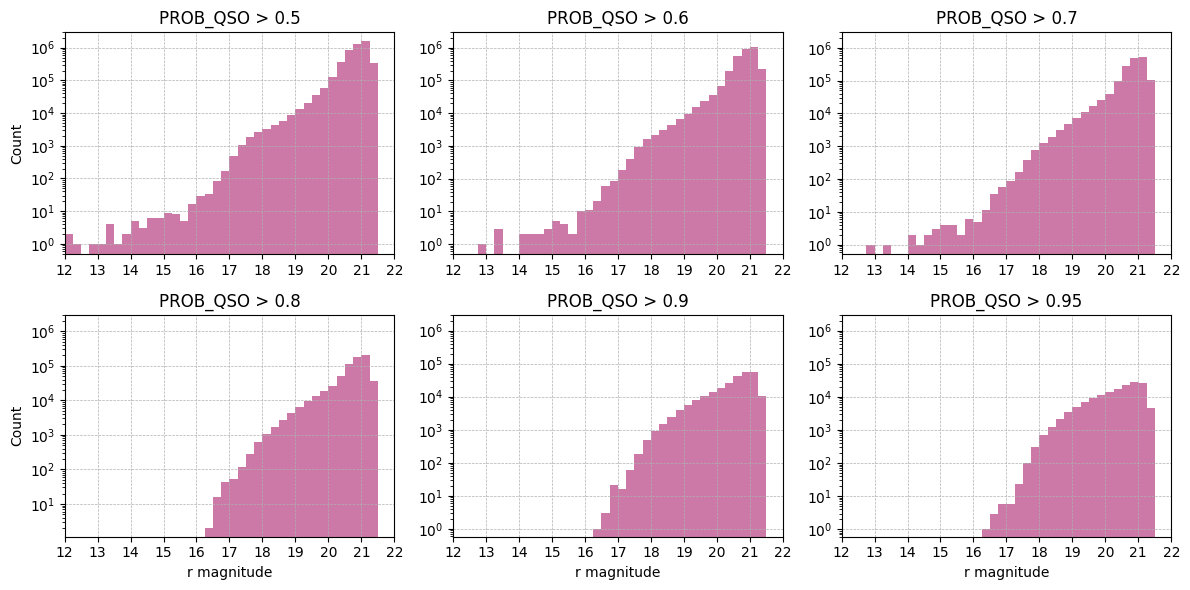

In [12]:
probs = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
b = 0.25
plt.figure(figsize=(12, 6))
for i in tqdm(range(len(probs))):
    plt.subplot(2, 3, i+1)
    cut = qsos.query(f'PROB_QSO > {probs[i]}')
    plt.hist(cut['r_PStotal'], bins=np.arange(12, 22+b, b), log=True, color=colors[3])
    if i%3 == 0: plt.ylabel('Count')
    if i>2: plt.xlabel('r magnitude')
    plt.xticks(range(11, 23))
    plt.xlim(12, 22)
    plt.ylim(None, 3e6)
    plt.grid(lw=0.5, ls='--')
    plt.title(f'PROB_QSO > {probs[i]}')
plt.tight_layout()
if savefigs: plt.savefig(os.path.join(path_img, 'hist_r_qprobs'), bbox_inches='tight')
plt.show()

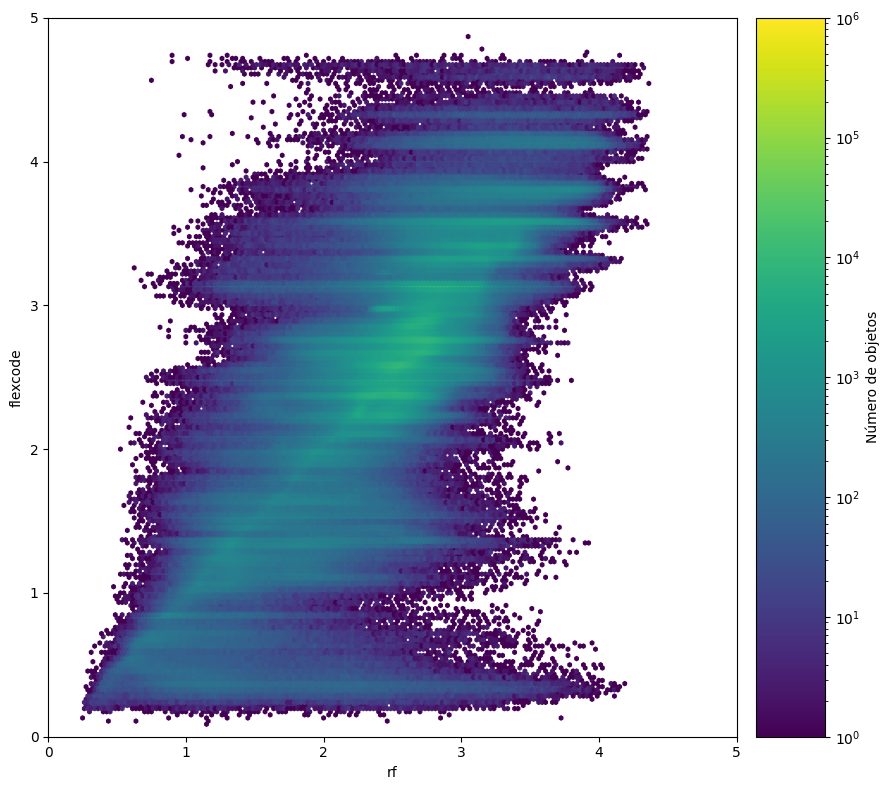

In [15]:
fig = plt.figure(figsize=(9, 8))
gs = GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[1, 0.1])
ax = fig.add_subplot(gs[0])

im = ax.hexbin(qsos['z_rf'], qsos['z_flex_peak'], norm=clr.LogNorm(vmax=1e6),
                        gridsize=200, mincnt=1, cmap='viridis', extent=(0, 5, 0, 5))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('rf')
ax.set_ylabel('flexcode')

ax_cb = fig.add_subplot(gs[1])
plt.colorbar(im, cax=ax_cb)
ax_cb.set_ylabel('Número de objetos')

fig.tight_layout()
if savefigs: plt.savefig(os.path.join(path_img, 'rf_flex_qsos'), bbox_inches='tight')
plt.show()

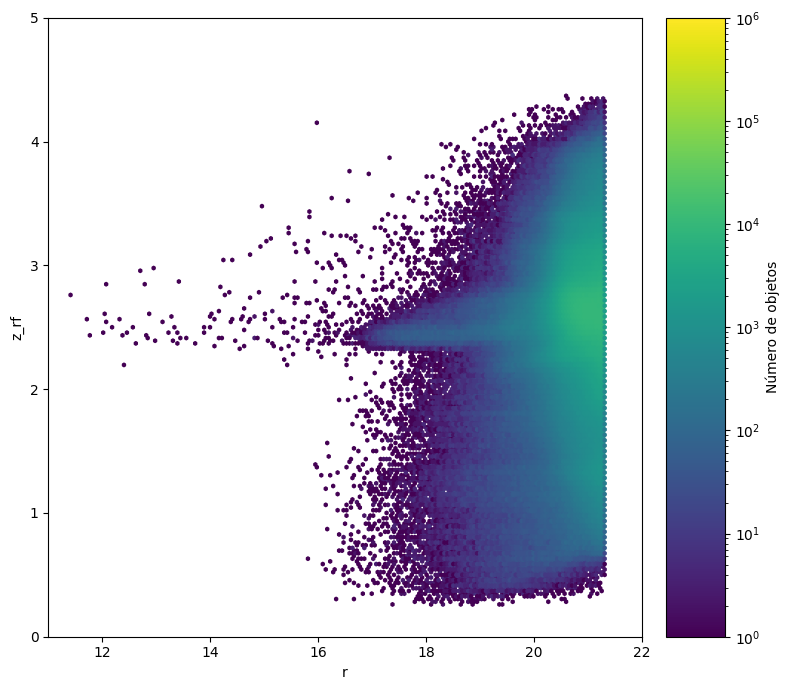

In [16]:
fig = plt.figure(figsize=(8, 7))
gs = GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[1, 0.1])
ax = fig.add_subplot(gs[0])

im = ax.hexbin(qsos['r_PStotal'], qsos['z_rf'], norm=clr.LogNorm(vmax=1e6),
                        gridsize=200, mincnt=1, cmap='viridis', extent=(11, 22, 0, 5))
ax.set_xlim(11, 22)
ax.set_ylim(0, 5)
ax.set_xlabel('r')
ax.set_ylabel('z_rf')

ax_cb = fig.add_subplot(gs[1])
plt.colorbar(im, cax=ax_cb)
ax_cb.set_ylabel('Número de objetos')

fig.tight_layout()
if savefigs: plt.savefig(os.path.join(path_img, 'r_rf_qsos'), bbox_inches='tight')
plt.show()